In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix

In [2]:
df_sub = pd.read_csv('../data/df_all_subm.csv')
df_com = pd.read_csv('../data/df_all_comm.csv')

In [3]:
X_sub = df_sub[['compound_si']]
y_sub = df_sub['is_news']

X_com = df_com[['compound_si']]
y_com = df_com['is_news']

In [4]:
X_com['compound_si'].sort_values(ascending = False)

246     0.9895
364     0.9832
651     0.9806
1016    0.9802
466     0.9793
         ...  
1616   -0.9915
243    -0.9919
597    -0.9935
141    -0.9936
1272   -0.9952
Name: compound_si, Length: 1763, dtype: float64

In [5]:
df_sub['is_news']

0       0
1       0
2       0
3       0
4       0
       ..
1613    1
1614    1
1615    1
1616    1
1617    1
Name: is_news, Length: 1618, dtype: int64

In [8]:
XS_train, XS_test, yS_train, yS_test = train_test_split(X_sub, y_sub, stratify = y_sub)
XC_train, XC_test, yC_train, yC_test = train_test_split(X_com, y_com, stratify = y_com)

In [9]:
yS_train.value_counts(normalize = True), yC_train.value_counts(normalize = True)

(1    0.609233
 0    0.390767
 Name: is_news, dtype: float64,
 1    0.521936
 0    0.478064
 Name: is_news, dtype: float64)

In [26]:
logr = LogisticRegression()

# logreg model trained on submissions data
logr.fit(XS_train, yS_train)

LogisticRegression()

In [27]:
logr.score(XS_train, yS_train), logr.score(XS_test, yS_test)

(0.5952184666117065, 0.6098765432098765)

In [28]:
logr.score(XC_train, yC_train), logr.score(XC_test, yC_test)

(0.5416036308623298, 0.564625850340136)

In [29]:
logr1 = LogisticRegression()

# logreg model trained on comments data
logr1.fit(XC_train, yC_train)

LogisticRegression()

In [30]:
logr1.score(XC_train, yC_train), logr.score(XC_test, yC_test)

(0.5453857791225416, 0.564625850340136)

In [31]:
logr1.score(XS_train, yS_train), logr.score(XS_test, yS_test)

(0.5919208573784006, 0.6098765432098765)

In [82]:
preds = logr.predict(XS_test)

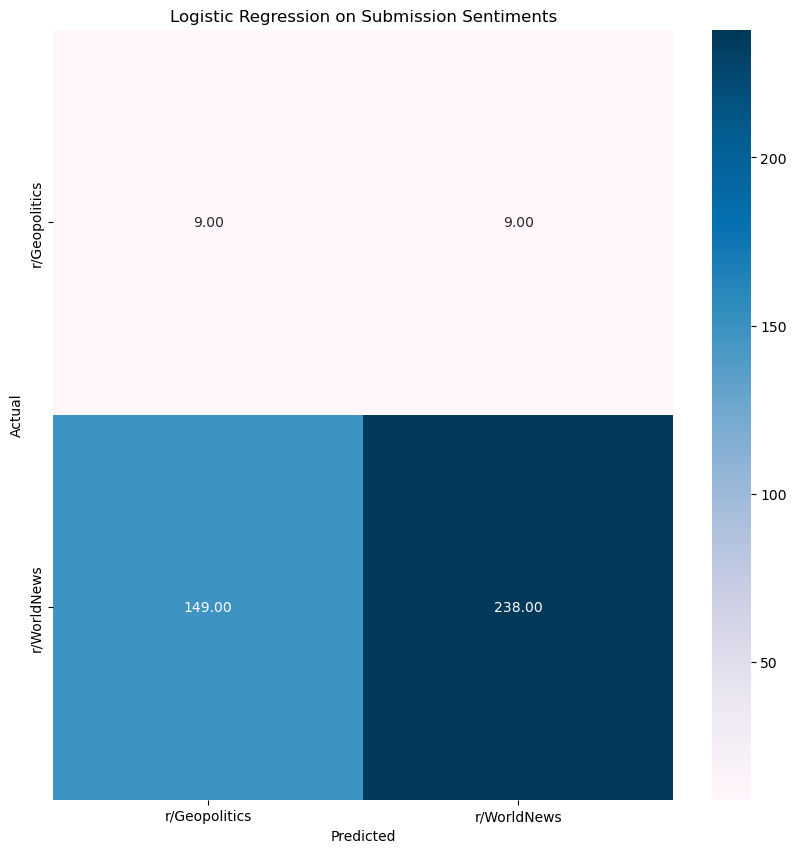

In [94]:
cm = confusion_matrix(preds, yS_test)

# https://stackoverflow.com/questions/20927368/how-to-normalize-a-confusion-matrix

cmn = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=['r/Geopolitics', 'r/WorldNews'],
            yticklabels = ['r/Geopolitics', 'r/WorldNews'], cmap = 'PuBu')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Logistic Regression on Submission Sentiments')

plt.savefig('../visuals/cm_subm_sentim.png')

In [76]:
yS_test.value_counts()

1    247
0    158
Name: is_news, dtype: int64

In [77]:
# null model 
null_preds = [1]*len(yS_test)

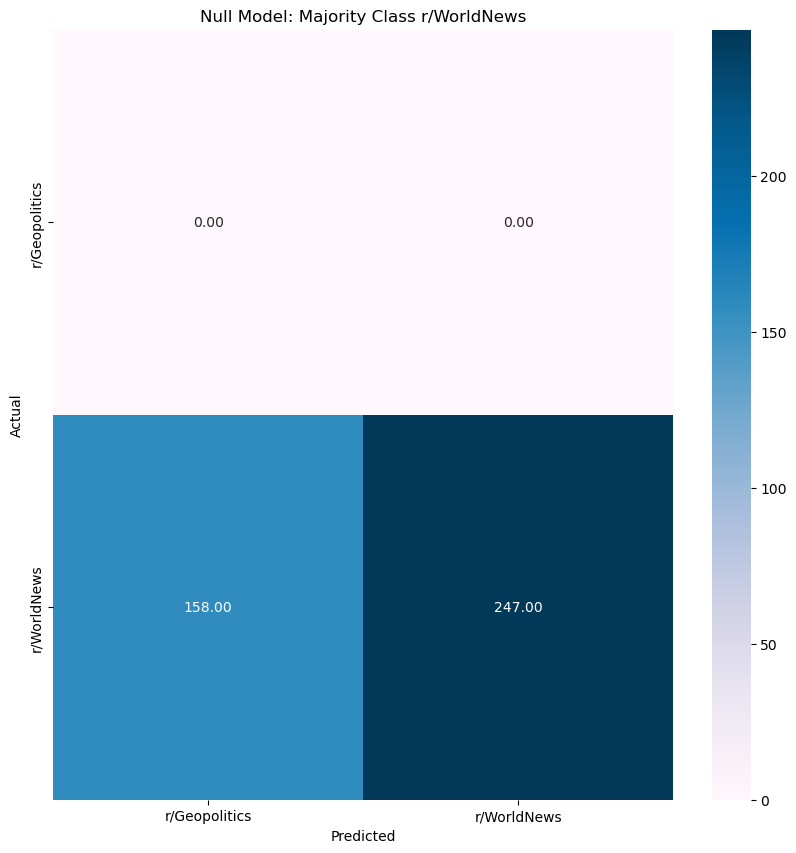

In [95]:
null_cm = confusion_matrix(null_preds, yS_test)

# https://stackoverflow.com/questions/20927368/how-to-normalize-a-confusion-matrix

#null_cmn = null_cm.astype('float') / null_cm.sum(axis = 1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(null_cm, annot=True, fmt='.2f', xticklabels=['r/Geopolitics', 'r/WorldNews'],
            yticklabels = ['r/Geopolitics', 'r/WorldNews'], cmap = 'PuBu')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Null Model: Majority Class r/WorldNews')
# plt.show(block=False)

plt.savefig('../visuals/cm_null_sentim.png')

In [10]:
# random forest model fit to submission title sentiment intensity scores

rfc_subs = RandomForestClassifier()

rfc_subs.fit(XS_train, yS_train)

RandomForestClassifier()

In [11]:
rfc_subs.score(XS_train, yS_train), rfc_subs.score(XS_test, yS_test)

(0.6809563066776587, 0.5703703703703704)

In [19]:
# submission sentiment-trained model performance on comments

rfc_subs.score(XC_train, yC_train), rfc_subs.score(XC_test, yC_test)

(0.48940998487140697, 0.47845804988662133)

In [13]:
# random forest model fit to comment body sentiment intensity scores

rfc_coms = RandomForestClassifier()

rfc_coms.fit(XC_train, yC_train)

RandomForestClassifier()

In [14]:
rfc_subs.score(XC_train, yC_train), rfc_subs.score(XC_test, yC_test)

(0.48940998487140697, 0.47845804988662133)

In [15]:
rfc_subs.score(XS_train, yS_train), rfc_subs.score(XS_test, yS_test)

(0.6809563066776587, 0.5703703703703704)